# Final Project
## Name: Accidents Severity Analysis and Prediction

Project Type (Analysis)  DSC 478
Team Members: Di Han, Wanshu Wang

# Classification 

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
%pwd

In [3]:
df_balanced = pd.read_csv("data_balanced.csv")

In [106]:
df_cleaned = pd.read_csv("data_unbalanced.csv")

In [109]:
df_numeric = df_cleaned
df_numeric.shape

(1516064, 55)

In [110]:
df_numeric

,Unnamed: 0,Severity,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Amenity,Bump,...,Weather_Condition_Cloudy,Weather_Condition_Fog,Weather_Condition_Hail,Weather_Condition_Rain,Weather_Condition_Sand,Weather_Condition_Smoke,Weather_Condition_Snow,Weather_Condition_Thunderstorm,Weather_Condition_Tornado,Weather_Condition_Windy
0,0,3,3.230,42.1,58.0,29.76,10.0,10.400000,1,1,...,0,0,0,1,0,0,0,0,0,0
1,1,2,0.747,36.9,91.0,29.68,10.0,9.863415,1,1,...,0,0,0,1,0,0,0,0,0,0
2,2,2,0.055,36.0,97.0,29.70,10.0,9.166000,1,1,...,1,0,0,0,0,0,0,0,0,0
3,3,2,0.219,36.0,97.0,29.70,10.0,9.166000,1,1,...,1,0,0,0,0,0,0,0,0,0
4,4,2,0.123,39.0,55.0,29.65,10.0,10.397143,1,1,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1516059,1516059,2,0.543,86.0,40.0,28.92,10.0,13.000000,1,1,...,0,0,0,0,0,0,0,0,0,0
1516060,1516060,2,0.338,70.0,73.0,29.39,10.0,6.000000,1,1,...,0,0,0,0,0,0,0,0,0,0
1516061,1516061,2,0.561,73.0,64.0,29.74,10.0,10.000000,1,1,...,1,0,0,0,0,0,0,0,0,0
1516062,1516062,2,0.772,71.0,81.0,29.62,10.0,8.000000,1,1,...,0,0,0,0,0,0,0,0,0,0


In [7]:
df_numeric

,Unnamed: 0,Severity,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Amenity,Bump,...,Weather_Condition_Cloudy,Weather_Condition_Fog,Weather_Condition_Hail,Weather_Condition_Rain,Weather_Condition_Sand,Weather_Condition_Smoke,Weather_Condition_Snow,Weather_Condition_Thunderstorm,Weather_Condition_Tornado,Weather_Condition_Windy
0,0,3,3.230,42.1,58.0,29.76,10.0,10.400000,1,1,...,0,0,0,1,0,0,0,0,0,0
1,1,2,0.747,36.9,91.0,29.68,10.0,9.863415,1,1,...,0,0,0,1,0,0,0,0,0,0
2,2,2,0.055,36.0,97.0,29.70,10.0,9.166000,1,1,...,1,0,0,0,0,0,0,0,0,0
3,3,2,0.219,36.0,97.0,29.70,10.0,9.166000,1,1,...,1,0,0,0,0,0,0,0,0,0
4,4,2,0.123,39.0,55.0,29.65,10.0,10.397143,1,1,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1516059,1516059,2,0.543,86.0,40.0,28.92,10.0,13.000000,1,1,...,0,0,0,0,0,0,0,0,0,0
1516060,1516060,2,0.338,70.0,73.0,29.39,10.0,6.000000,1,1,...,0,0,0,0,0,0,0,0,0,0
1516061,1516061,2,0.561,73.0,64.0,29.74,10.0,10.000000,1,1,...,1,0,0,0,0,0,0,0,0,0
1516062,1516062,2,0.772,71.0,81.0,29.62,10.0,8.000000,1,1,...,0,0,0,0,0,0,0,0,0,0


In [111]:
df_numeric = df_numeric.iloc[:, 1:55]
df_numeric.head()

,Severity,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Amenity,Bump,Crossing,...,Weather_Condition_Cloudy,Weather_Condition_Fog,Weather_Condition_Hail,Weather_Condition_Rain,Weather_Condition_Sand,Weather_Condition_Smoke,Weather_Condition_Snow,Weather_Condition_Thunderstorm,Weather_Condition_Tornado,Weather_Condition_Windy
0,3,3.230,42.1,58.0,29.76,10.0,10.400000,1,1,1,...,0,0,0,1,0,0,0,0,0,0
1,2,0.747,36.9,91.0,29.68,10.0,9.863415,1,1,1,...,0,0,0,1,0,0,0,0,0,0
2,2,0.055,36.0,97.0,29.70,10.0,9.166000,1,1,1,...,1,0,0,0,0,0,0,0,0,0
3,2,0.219,36.0,97.0,29.70,10.0,9.166000,1,1,1,...,1,0,0,0,0,0,0,0,0,0
4,2,0.123,39.0,55.0,29.65,10.0,10.397143,1,1,1,...,1,0,0,0,0,0,0,0,0,0


2    1212382
3     161052
4     114452
1      28178
Name: Severity, dtype: int64


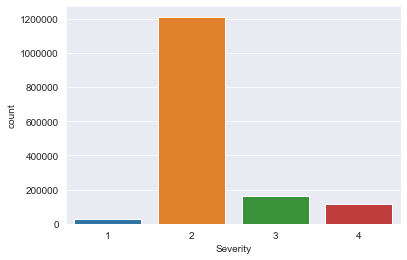

In [112]:
ax = sns.countplot(x = 'Severity', data = df_numeric)
print(df_numeric['Severity'].value_counts())

In [113]:
# undersampling
target = 'Severity'
minority_class_len = len(df_numeric[df_numeric[target] == 1])
print(minority_class_len)

28178


In [114]:
majority_class2_indices = df_numeric[df_numeric[target] == 2].index
print(majority_class2_indices)

Int64Index([      1,       2,       3,       4,       6,       7,       8,
                  9,      10,      11,
            ...
            1516054, 1516055, 1516056, 1516057, 1516058, 1516059, 1516060,
            1516061, 1516062, 1516063],
           dtype='int64', length=1212382)


In [115]:
majority_class3_indices = df_numeric[df_numeric[target] == 3].index
print(majority_class3_indices)

Int64Index([      0,       5,      16,      17,      18,      20,      23,
                 30,      31,      32,
            ...
            1515851, 1515857, 1515863, 1515882, 1516019, 1516020, 1516021,
            1516026, 1516027, 1516029],
           dtype='int64', length=161052)


In [116]:
majority_class4_indices = df_numeric[df_numeric[target] == 4].index
print(majority_class4_indices)

Int64Index([     21,      28,      41,      44,      45,      46,      47,
                 48,      49,      71,
            ...
            1515864, 1516017, 1516018, 1516022, 1516023, 1516024, 1516025,
            1516036, 1516037, 1516050],
           dtype='int64', length=114452)


In [117]:
minority_class_indices = df_numeric[df_numeric[target] == 1].index

In [118]:
random_majority2_indices = np.random.choice(majority_class2_indices,
                                          minority_class_len,
                                          replace = False)

In [119]:
random_majority3_indices = np.random.choice(majority_class3_indices,
                                          minority_class_len,
                                          replace = False)

In [120]:
random_majority4_indices = np.random.choice(majority_class4_indices,
                                          minority_class_len,
                                          replace = False)

In [121]:
under_sample_indices = np.concatenate([minority_class_indices, random_majority2_indices, random_majority3_indices, random_majority4_indices])

In [122]:
under_sample = df_numeric.loc[under_sample_indices]

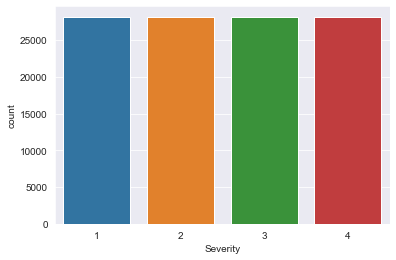

In [123]:
sns.countplot(x = target, data = under_sample)

In [124]:
df_numeric = under_sample
df_numeric

,Severity,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Amenity,Bump,Crossing,...,Weather_Condition_Cloudy,Weather_Condition_Fog,Weather_Condition_Hail,Weather_Condition_Rain,Weather_Condition_Sand,Weather_Condition_Smoke,Weather_Condition_Snow,Weather_Condition_Thunderstorm,Weather_Condition_Tornado,Weather_Condition_Windy
237384,1,0.000,103.0,22.0,27.15,10.0,10.0,1,1,1,...,1,0,0,0,0,0,0,0,0,0
239465,1,0.000,95.0,19.0,27.16,10.0,10.0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
255869,1,0.000,68.0,93.0,29.14,9.0,5.0,1,1,1,...,0,0,0,0,0,0,0,1,0,0
258635,1,0.000,98.0,18.0,28.28,10.0,5.0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
260618,1,0.000,95.0,22.0,29.90,10.0,9.0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213536,4,0.183,73.0,30.0,29.88,10.0,18.4,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1275131,4,7.176,75.0,87.0,30.13,4.0,12.7,1,1,1,...,0,0,0,1,0,0,0,0,0,0
1389909,4,0.266,28.0,66.0,30.25,10.0,5.8,1,1,1,...,1,0,0,0,0,0,0,0,0,0
63983,4,0.056,70.0,81.0,30.16,10.0,12.7,1,1,1,...,1,0,0,0,0,0,0,0,0,0


In [125]:
df_target = df_numeric.iloc[:, 0]
df_target

237384     1
239465     1
255869     1
258635     1
260618     1
          ..
213536     4
1275131    4
1389909    4
63983      4
254968     4
Name: Severity, Length: 112712, dtype: int64

In [126]:
df_target.shape

(112712,)

In [127]:
df_numeric.shape

(112712, 54)

In [128]:
df_numeric = under_sample.iloc[:, 1:54]
df_numeric.head()

,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Amenity,Bump,Crossing,Give_Way,...,Weather_Condition_Cloudy,Weather_Condition_Fog,Weather_Condition_Hail,Weather_Condition_Rain,Weather_Condition_Sand,Weather_Condition_Smoke,Weather_Condition_Snow,Weather_Condition_Thunderstorm,Weather_Condition_Tornado,Weather_Condition_Windy
237384,0.0,103.0,22.0,27.15,10.0,10.0,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
239465,0.0,95.0,19.0,27.16,10.0,10.0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
255869,0.0,68.0,93.0,29.14,9.0,5.0,1,1,1,1,...,0,0,0,0,0,0,0,1,0,0
258635,0.0,98.0,18.0,28.28,10.0,5.0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
260618,0.0,95.0,22.0,29.90,10.0,9.0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [32]:
#df_numeric = df_numeric.iloc[:10000, :]
#df_numeric.shape

In [33]:
#df_target = df_target.iloc[:10000]
#df_target.shape

#### Finally, split the transformed data into training and test sets (using 80%-20% randomized split).

In [129]:
from sklearn.model_selection import train_test_split
train, test, target_train, target_test = train_test_split(df_numeric, df_target, test_size=0.2, random_state=33)

print (test.shape)
test[0:5]

(22543, 53)


,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Amenity,Bump,Crossing,Give_Way,...,Weather_Condition_Cloudy,Weather_Condition_Fog,Weather_Condition_Hail,Weather_Condition_Rain,Weather_Condition_Sand,Weather_Condition_Smoke,Weather_Condition_Snow,Weather_Condition_Thunderstorm,Weather_Condition_Tornado,Weather_Condition_Windy
215796,0.000,89.1,42.0,30.06,10.0,5.8,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1134658,5.669,58.0,51.0,23.36,10.0,0.0,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
799091,0.000,85.0,19.0,28.61,10.0,0.0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
450961,0.033,62.0,58.0,29.73,10.0,12.0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
896600,0.000,84.0,13.0,28.42,10.0,12.0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


### Use scikit-learn's KNN implementation for classification.
#### First normalize the data so that all attributes are in the same scale (normalize so that the values are between 0 and 1). 

In [130]:
from sklearn import preprocessing

In [131]:
min_max_scaler = preprocessing.MinMaxScaler().fit(train)
train_norm = min_max_scaler.transform(train)
test_norm = min_max_scaler.transform(test)

In [132]:
np.set_printoptions(precision=2, linewidth=80, suppress=True)
train_norm[0:5]

array([[0.02, 0.51, 0.93, 0.96, 0.07, 0.03, 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.91, 0.25, 0.  ,
        0.63, 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.74, 0.79, 0.95, 0.08, 0.04, 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.55, 1.  , 0.74,
        0.7 , 0.33, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 1.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.01, 0.73, 0.5 , 0.97, 0.08, 0.07, 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.64, 0.5 , 0.7 ,
        0.73, 0.5 , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  

In [133]:
test_norm[0:5]

array([[0.  , 0.8 , 0.41, 0.97, 0.08, 0.04, 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.45, 0.25, 0.43,
        0.37, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 1.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.04, 0.59, 0.5 , 0.75, 0.08, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.73, 0.75, 0.43,
        0.73, 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.78, 0.17, 0.92, 0.08, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.45, 1.  , 0.3 ,
        0.8 , 0.5 , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  

#### Run your KNN classifier using K=10. 

In [134]:
from sklearn import neighbors

In [135]:
n_neighbors = 10

knnclf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
knnclf.fit(train_norm, target_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='distance')

In [39]:
knnpreds_test = knnclf.predict(test_norm)

In [40]:
print (knnpreds_test)

[3 3 1 ... 4 4 2]


In [41]:
np.unique(knnpreds_test)

array([1, 2, 3, 4])

In [42]:
from sklearn.metrics import confusion_matrix

In [43]:
knncm = confusion_matrix(target_test, knnpreds_test)
print (knncm)

[[5381   54  246   58]
 [ 547 3245  944  872]
 [ 900  631 2481 1644]
 [ 457  836 1415 2832]]


In [44]:
from sklearn.metrics import classification_report

In [45]:
print(classification_report(target_test, knnpreds_test))

              precision    recall  f1-score   support

           1       0.74      0.94      0.83      5739
           2       0.68      0.58      0.63      5608
           3       0.49      0.44      0.46      5656
           4       0.52      0.51      0.52      5540

    accuracy                           0.62     22543
   macro avg       0.61      0.62      0.61     22543
weighted avg       0.61      0.62      0.61     22543



In [46]:
print (knnclf.score(train_norm, target_train))

0.9976044982200091


In [47]:
print (knnclf.score(test_norm, target_test))

0.6183294148959766


In [48]:
Distance = []
Uniform = []

In [49]:
%%time

for K in range(5, 100, 5):
    knnclf = neighbors.KNeighborsClassifier(K, weights='distance')
    knnclf.fit(train_norm, target_train)
    Distance.append(knnclf.score(test_norm, target_test))

CPU times: user 7min 1s, sys: 1.45 s, total: 7min 2s
Wall time: 6min 51s


In [50]:
%%time

for K in range(5, 100, 5):
    knnclf = neighbors.KNeighborsClassifier(K, weights='uniform')
    knnclf.fit(train_norm, target_train)
    Uniform.append(knnclf.score(test_norm, target_test))

CPU times: user 7min 10s, sys: 1.09 s, total: 7min 12s
Wall time: 7min 1s


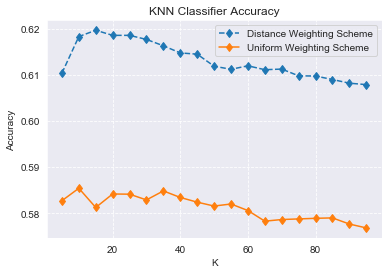

In [51]:
import matplotlib.pyplot as plt
  
# Ks
Ks = np.arange(5, 100, 5)
  
# plot lines
plt.plot(Ks, Distance, label = "Distance Weighting Scheme", linestyle = 'dashed', marker = 'd')
plt.plot(Ks, Uniform, label = "Uniform Weighting Scheme", marker = 'd')
plt.title('KNN Classifier Accuracy')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.grid(linestyle = 'dashed')
plt.legend()
plt.show()

In [52]:
n_neighbors = 10

knnclf = neighbors.KNeighborsClassifier(n_neighbors, weights='uniform')
knnclf.fit(train_norm, target_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [53]:
print (knnclf.score(train_norm, target_train))

0.6555689871241779


In [54]:
print (knnclf.score(test_norm, target_test))

0.5854145410992326


#### Next, using only "uniform" weights, compare the accuracy of the KNN classifier across the different values of K on the training and the test data. 

In [55]:
Accuracy_train = []
Accuracy_test = []

In [56]:
%%time

for K in range(5, 100, 5):
    knnclf = neighbors.KNeighborsClassifier(K, weights='uniform')
    knnclf.fit(train_norm, target_train)
    Accuracy_train.append(knnclf.score(train_norm, target_train))

CPU times: user 25min 50s, sys: 4.38 s, total: 25min 55s
Wall time: 26min 22s


In [57]:
%%time

for K in range(5, 100, 5):
    knnclf = neighbors.KNeighborsClassifier(K, weights='uniform')
    knnclf.fit(train_norm, target_train)
    Accuracy_test.append(knnclf.score(test_norm, target_test))

CPU times: user 6min 53s, sys: 1.99 s, total: 6min 55s
Wall time: 6min 46s


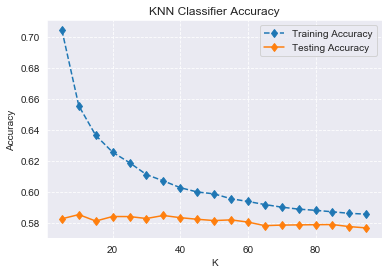

In [58]:
# Ks
Ks = np.arange(5, 100, 5)
  
# plot lines
plt.plot(Ks, Accuracy_train, label = "Training Accuracy", linestyle = 'dashed', marker = 'd')
plt.plot(Ks, Accuracy_test, label = "Testing Accuracy", marker = 'd')
plt.title('KNN Classifier Accuracy')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.grid(linestyle = 'dashed')
plt.legend()
plt.show()

### Using the non-normalized training and test data, perform classification using scikit-learn's decision tree classifier (using the default parameters). 

In [136]:
from sklearn import tree

In [137]:
treeclf = tree.DecisionTreeClassifier()
treeclf = treeclf.fit(train, target_train)

In [138]:
treepreds_test = treeclf.predict(test)
print (treepreds_test)

[3 2 1 ... 4 3 2]


In [139]:
np.unique(treepreds_test)

array([1, 2, 3, 4])

As above, generate the confusion matrix, classification report, and average accuracy scores of the classifier. Compare the average accuracy score on the test and the training data sets.

In [140]:
treecm = confusion_matrix(target_test, treepreds_test)
print (treecm)

[[4844  286  453  156]
 [ 330 3297  960 1021]
 [ 477  958 2597 1624]
 [ 166  994 1445 2935]]


In [141]:
print(classification_report(target_test, treepreds_test))

              precision    recall  f1-score   support

           1       0.83      0.84      0.84      5739
           2       0.60      0.59      0.59      5608
           3       0.48      0.46      0.47      5656
           4       0.51      0.53      0.52      5540

    accuracy                           0.61     22543
   macro avg       0.60      0.61      0.60     22543
weighted avg       0.61      0.61      0.61     22543



In [142]:
print (treeclf.score(train, target_train))

0.9977264913662124


In [143]:
print (treeclf.score(test, target_test))

0.6065297431575212


### Naïve Bayese

Use scikit-learn to build classifiers using Naive Bayes (Gaussian)

In [72]:
from sklearn import naive_bayes

In [74]:
nbclf = naive_bayes.GaussianNB()
nbclf = nbclf.fit(train, target_train)
nbpreds_test = nbclf.predict(test)
print (nbpreds_test)

[3 3 1 ... 2 2 2]


In [75]:
print (nbclf.score(train, target_train))

0.5292284488016946


In [76]:
print (nbclf.score(test, target_test))

0.533203211639977


### Linear discriminat analysis

In [77]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

ldclf = LinearDiscriminantAnalysis()
ldclf = ldclf.fit(train, target_train)
ldpreds_test = ldclf.predict(test)
print (ldpreds_test)

[3 3 1 ... 4 4 2]


/Users/dhan/opt/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [78]:
print (ldclf.score(train, target_train))

0.5447992103716355


In [79]:
print (ldclf.score(test, target_test))

0.5412323115823093


For each of these perform 10-fold cross-validation on the 80% training data (using cross-validation module in scikit-learn) and report the overall average accuracy. Compare this cross-validation accuracy to the model accuracy on the training data as a whole.

In [81]:
from sklearn import model_selection

In [82]:
nb_scores = model_selection.cross_val_score(nbclf, train, target_train, cv=10)
nb_scores

array([0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.52, 0.53])

In [83]:
print("Overall Accuracy: %0.2f (+/- %0.2f)" % (nb_scores.mean(), nb_scores.std() * 2))

Overall Accuracy: 0.53 (+/- 0.01)


In [84]:
ld_scores = model_selection.cross_val_score(ldclf, train, target_train, cv=10)
ld_scores

/Users/dhan/opt/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/dhan/opt/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/dhan/opt/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/dhan/opt/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/dhan/opt/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/dhan/opt/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.


array([0.55, 0.54, 0.54, 0.55, 0.55, 0.55, 0.55, 0.54, 0.54, 0.55])

In [85]:
print("Overall Accuracy: %0.2f (+/- %0.2f)" % (ld_scores.mean(), ld_scores.std() * 2))

Overall Accuracy: 0.54 (+/- 0.01)


Finally, run the model on the set-aside 20% test data.

In [86]:
print (nbclf.score(test, target_test))

0.533203211639977


In [88]:
print (ldclf.score(test, target_test))

0.5412323115823093


In [144]:
print (treeclf.score(test, target_test))

0.6065297431575212


Decisino tree method has the highest accuracy. 

We can obtain summary results on how informative are each of the features in the data:

In [145]:
print("Feature Importances:\n{}".format(treeclf.feature_importances_))

Feature Importances:
[0.22 0.07 0.08 0.09 0.02 0.05 0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.11 0.1  0.05 0.06 0.03 0.01 0.   0.   0.   0.01 0.
 0.   0.   0.   0.01 0.   0.   0.01 0.01 0.   0.01 0.   0.01 0.01 0.01 0.
 0.   0.   0.   0.   0.   0.   0.   0.  ]


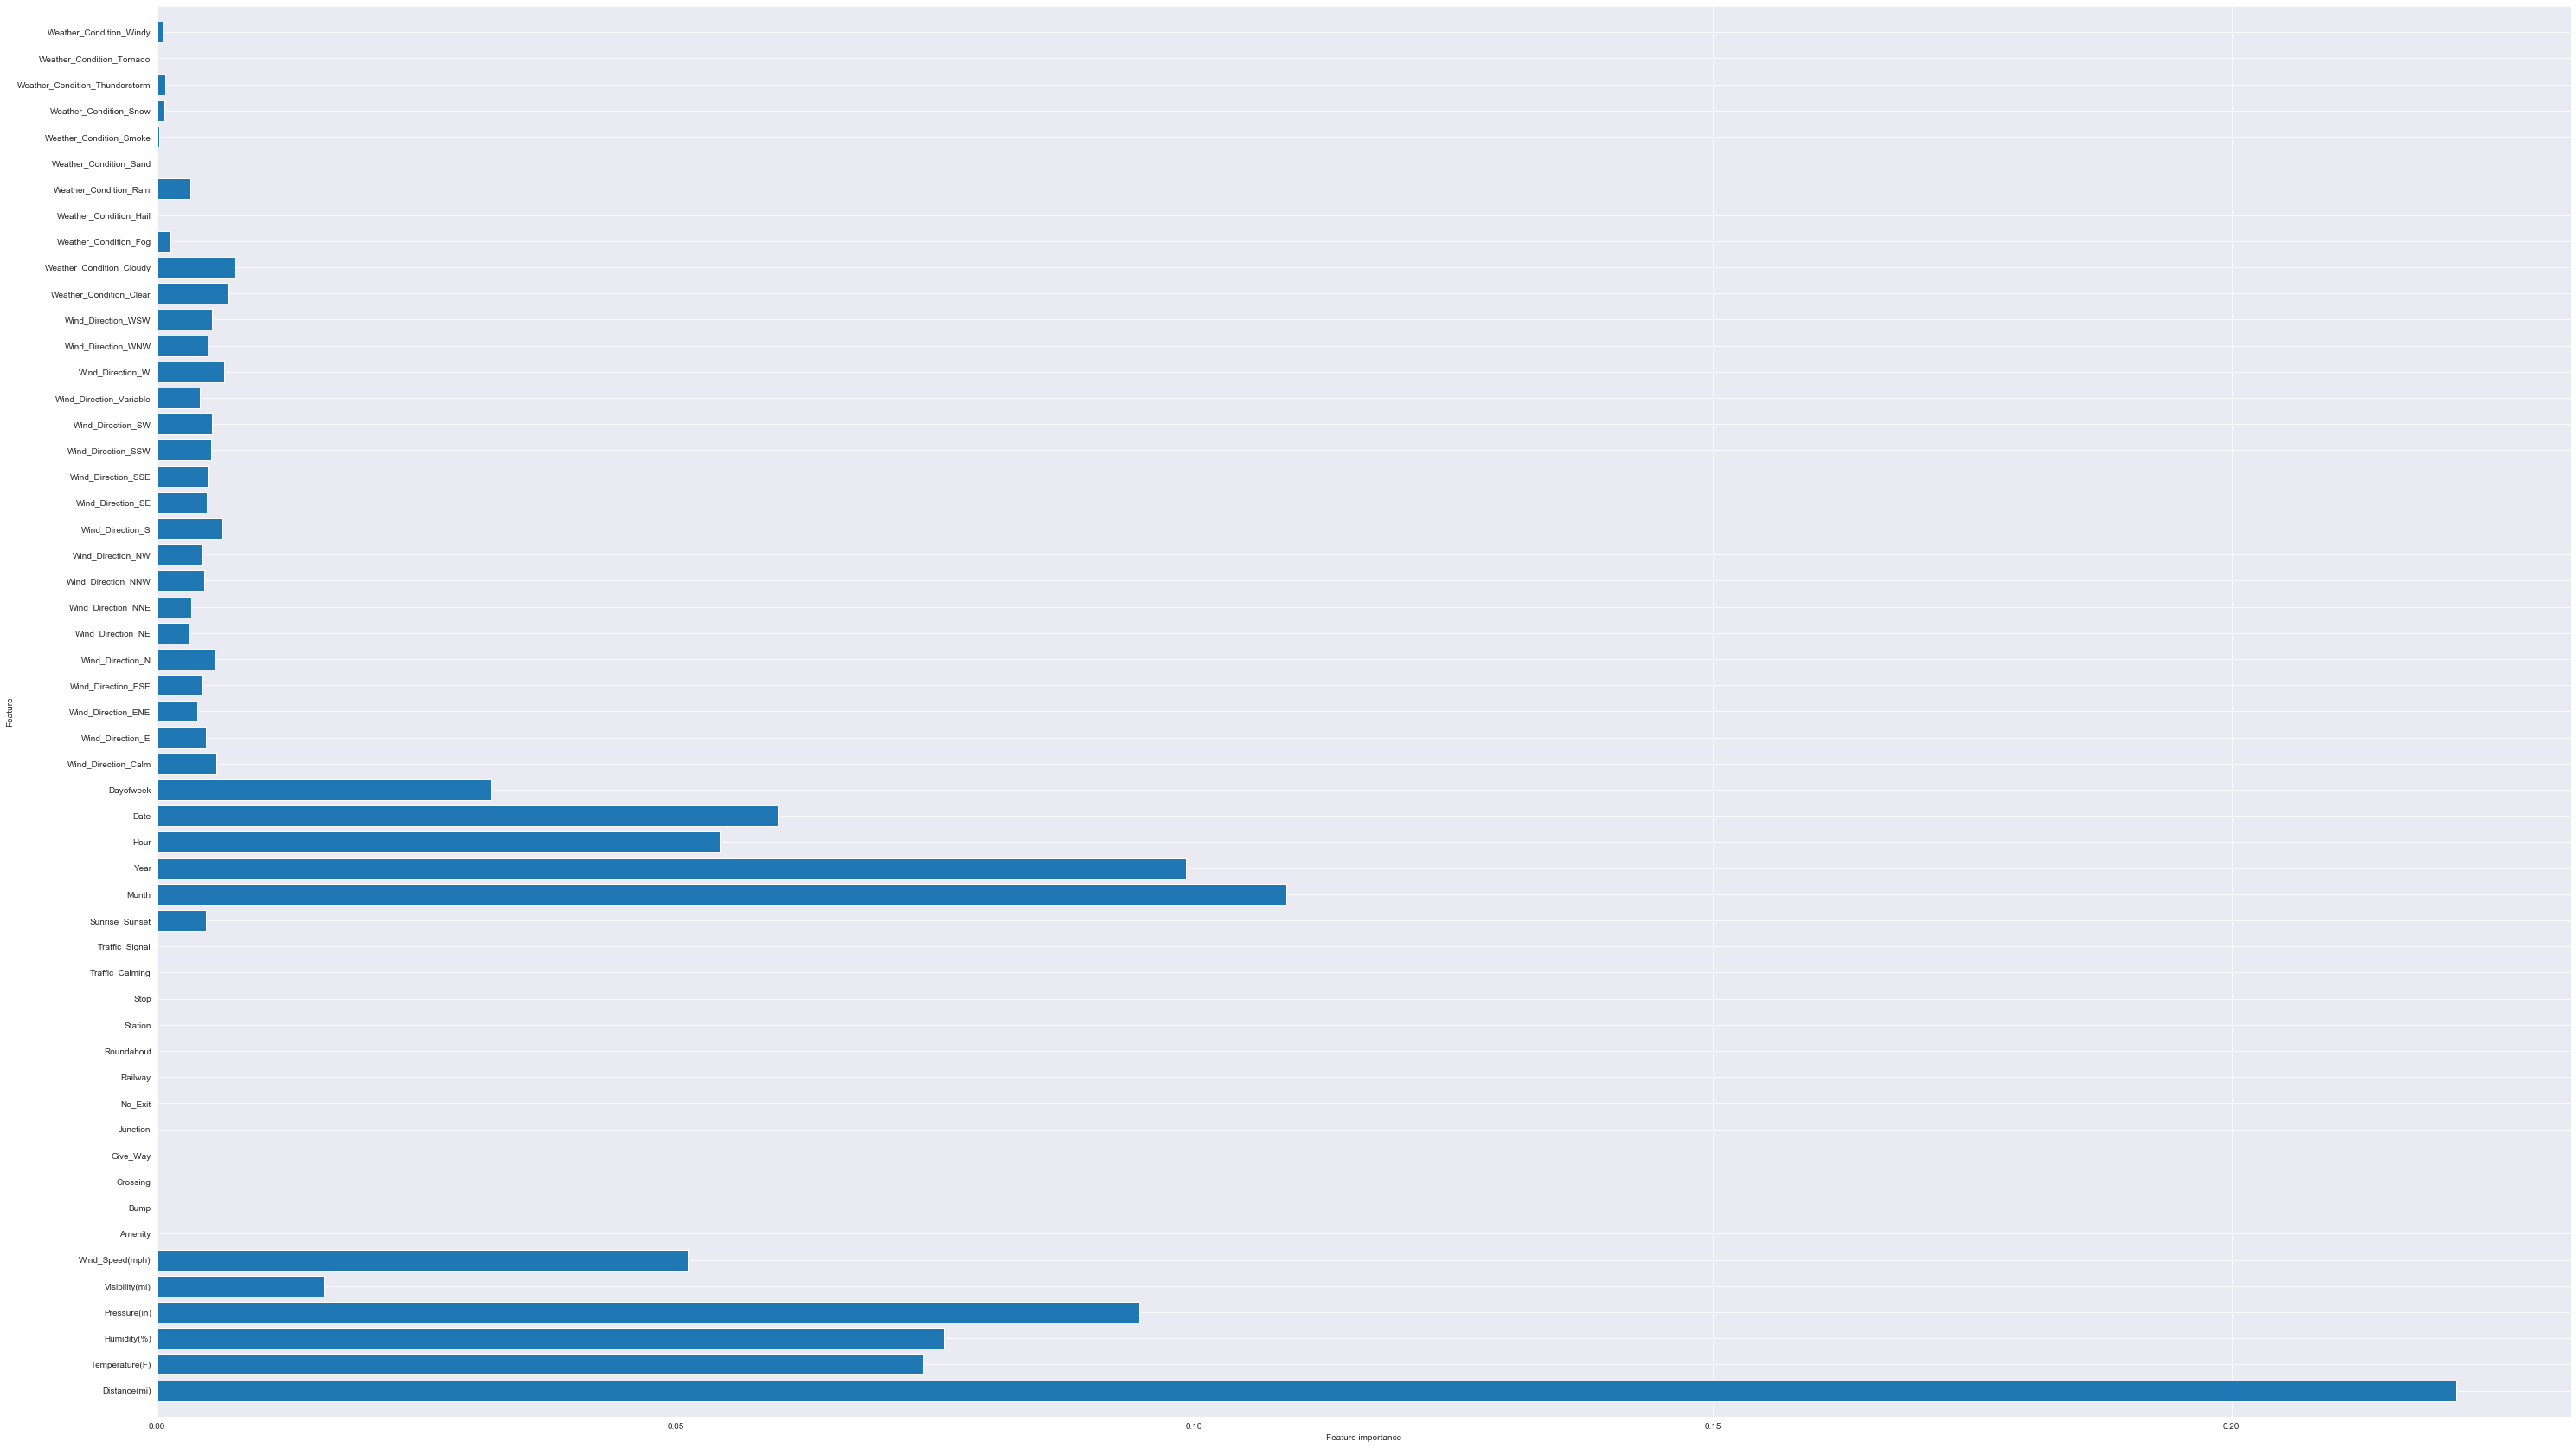

In [148]:
import pylab as plt
%matplotlib inline

def plot_feature_importances(model, n_features, feature_names):
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
plt.figure(figsize=(50, 30))
plot_feature_importances(treeclf, len(df_numeric.columns), df_numeric.columns)

#### The above evaluation results indicate overfitting. Pruning the tree may help in reducing overfitting. Accuracy of training is 0.99. The accuracy of testing is 0.59. 

In [149]:
treeclf = tree.DecisionTreeClassifier(criterion='entropy', min_samples_leaf=3)
cv_scores = model_selection.cross_val_score(treeclf, df_numeric, df_target, cv=5)
print (cv_scores)
print("Overall Accuracy on X-Val: %0.2f (+/- %0.2f)" % (cv_scores.mean(), cv_scores.std() * 2))

treeclf = treeclf.fit(train, target_train)
print ("Accuracy on Training: ",  treeclf.score(train, target_train))

[0.44 0.47 0.45 0.46 0.47]
Overall Accuracy on X-Val: 0.46 (+/- 0.02)
Accuracy on Training:  0.8956404085661369


In [151]:
treeclf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4)
cv_scores = model_selection.cross_val_score(treeclf, df_numeric, df_target, cv=5)
print (cv_scores)
print("Overall Accuracy on X-Val: %0.2f (+/- %0.2f)" % (cv_scores.mean(), cv_scores.std() * 2))

treeclf = treeclf.fit(train, target_train)
print ("Accuracy on Training: ",  treeclf.score(train, target_train))

[0.61 0.61 0.61 0.62 0.6 ]
Overall Accuracy on X-Val: 0.61 (+/- 0.01)
Accuracy on Training:  0.6064279297763089


In [155]:
treeclf = tree.DecisionTreeClassifier(criterion='gini', min_samples_leaf=3, max_depth=4)
cv_scores = model_selection.cross_val_score(treeclf, df_numeric, df_target, cv=5)
print (cv_scores)
print("Overall Accuracy on X-Val: %0.2f (+/- %0.2f)" % (cv_scores.mean(), cv_scores.std() * 2))

treeclf = treeclf.fit(train, target_train)
print ("Accuracy on Training: ",  treeclf.score(train, target_train))

[0.61 0.61 0.61 0.61 0.6 ]
Overall Accuracy on X-Val: 0.61 (+/- 0.00)
Accuracy on Training:  0.6097106544377779


In [156]:
print (treeclf.score(test, target_test))

0.6111431486492481


This "gini" is the best. And from the result we can see theere is no overfitting issuee. 

In [154]:
print(classification_report(target_test, treepreds_test))

              precision    recall  f1-score   support

           1       0.83      0.84      0.84      5739
           2       0.60      0.59      0.59      5608
           3       0.48      0.46      0.47      5656
           4       0.51      0.53      0.52      5540

    accuracy                           0.61     22543
   macro avg       0.60      0.61      0.60     22543
weighted avg       0.61      0.61      0.61     22543



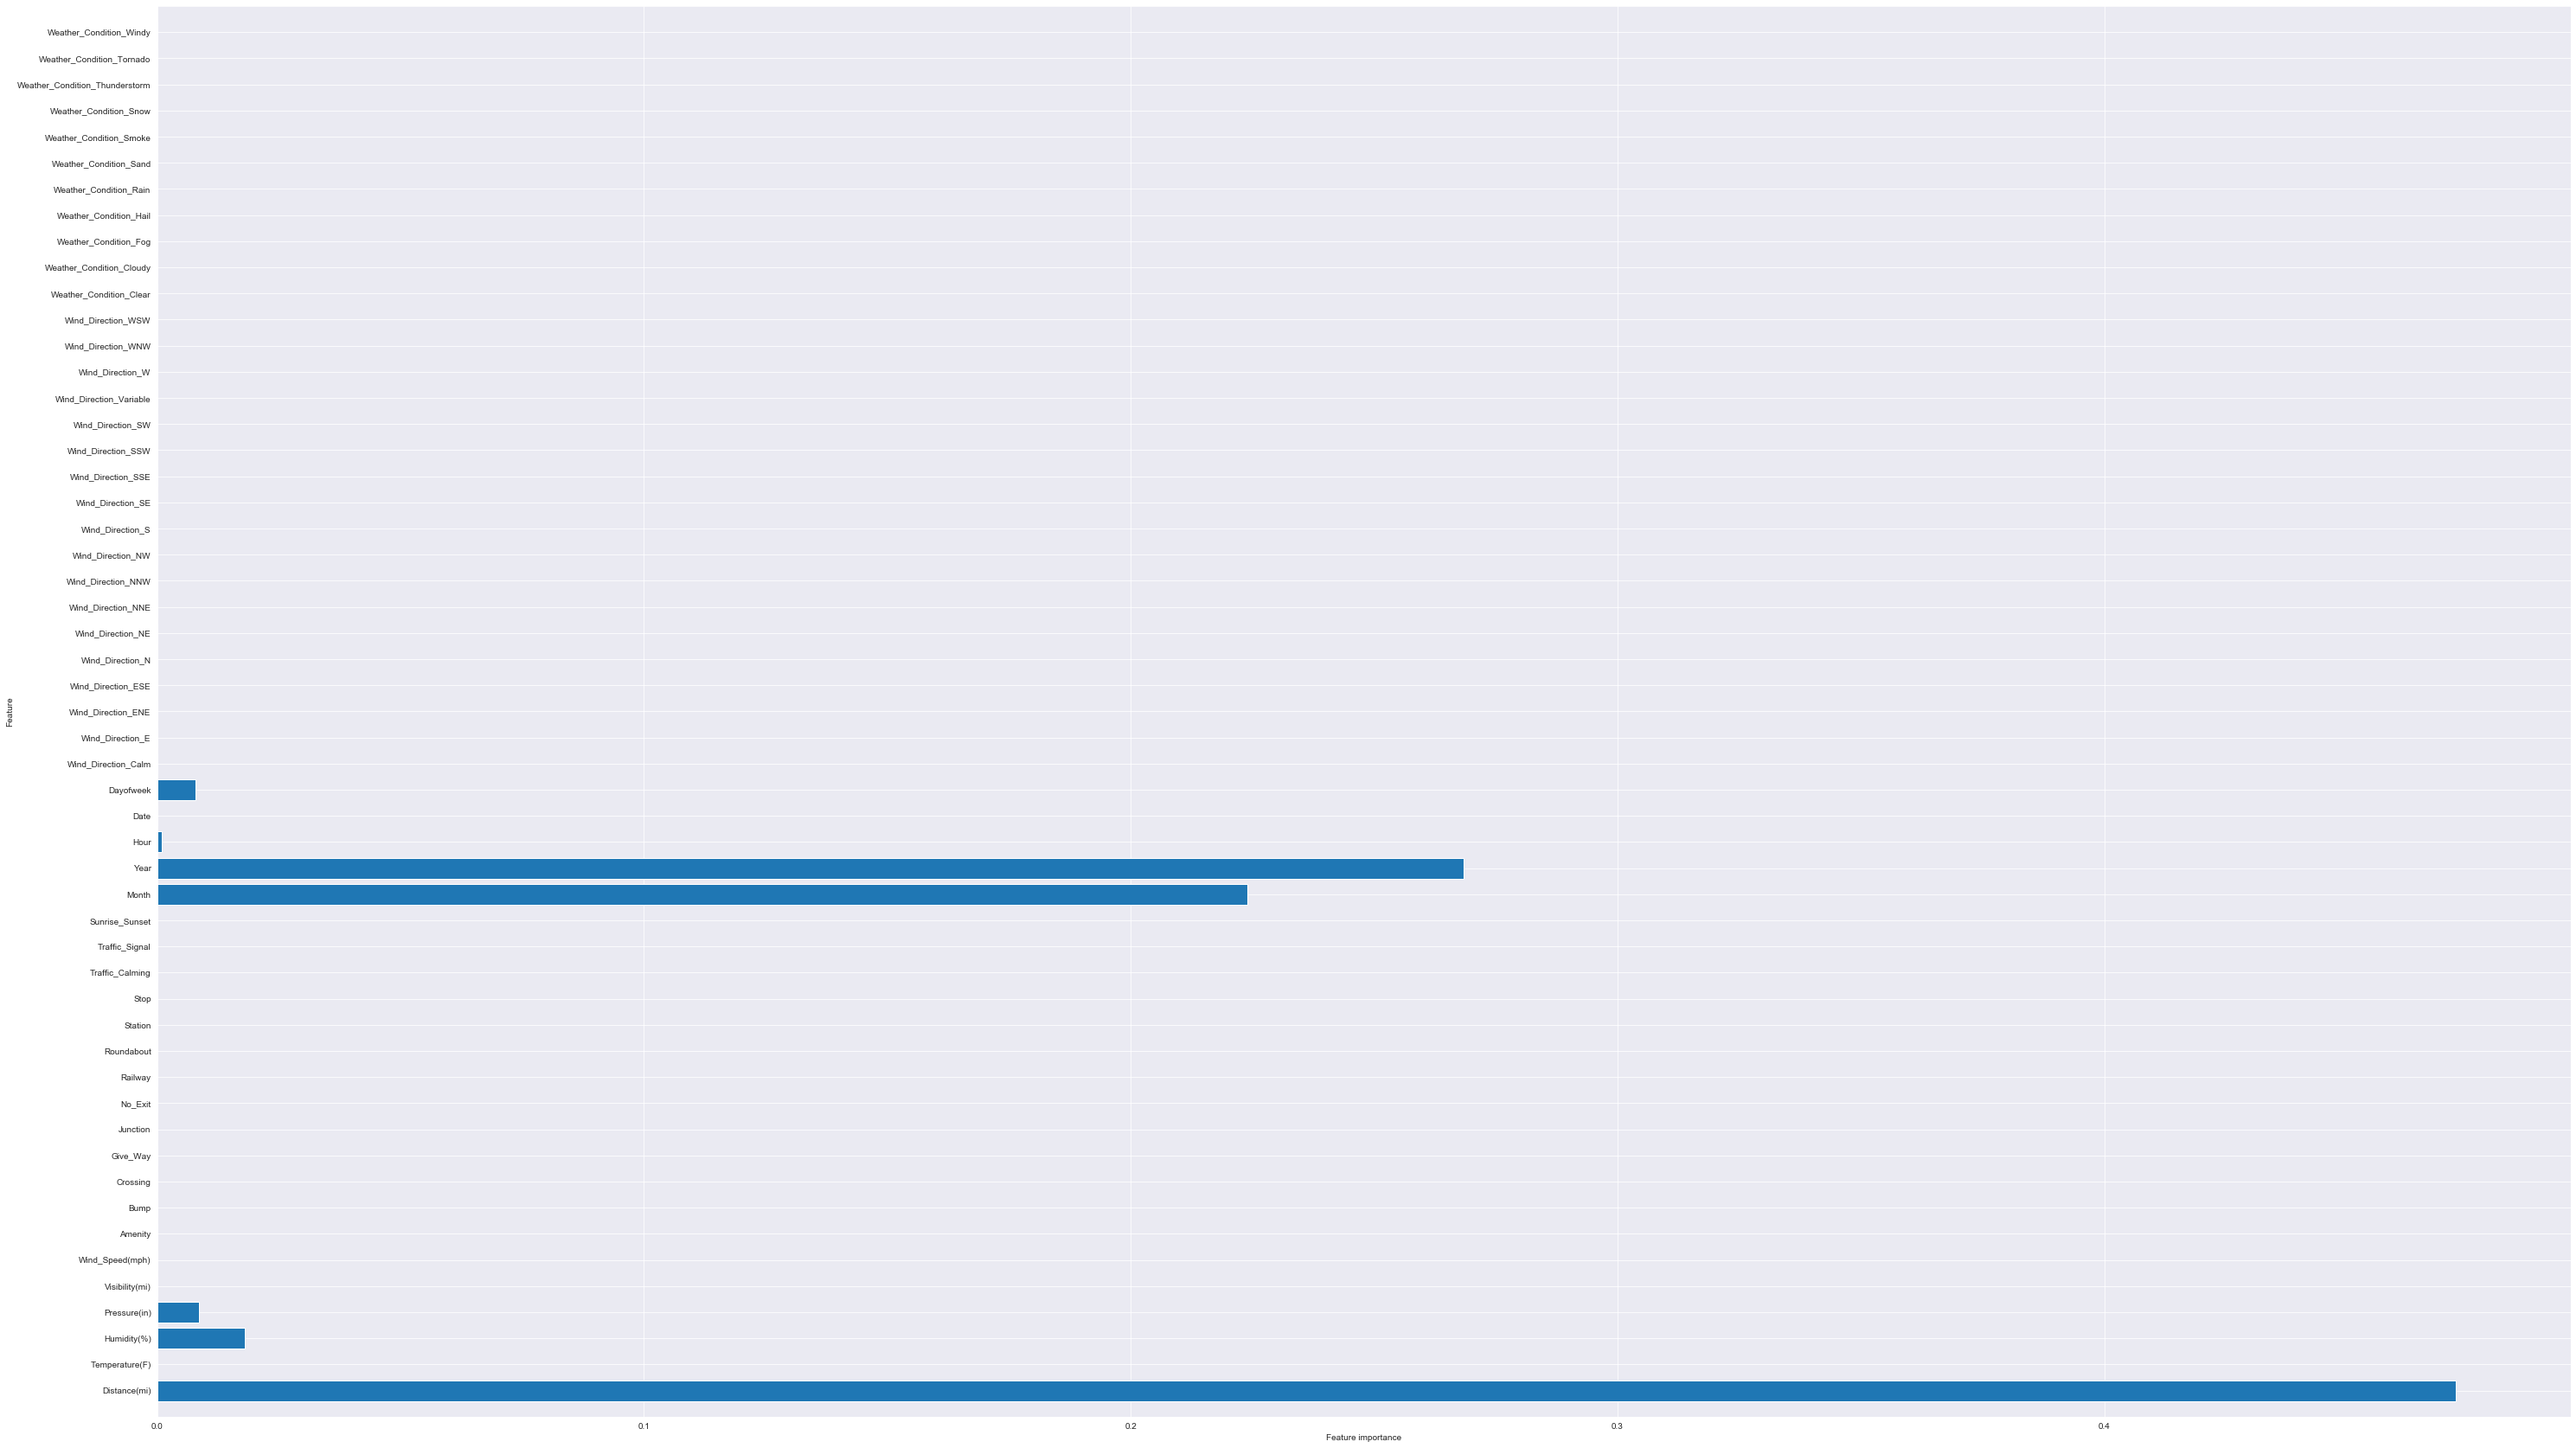

In [157]:
import pylab as plt
%matplotlib inline

def plot_feature_importances(model, n_features, feature_names):
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
plt.figure(figsize=(50, 30))
plot_feature_importances(treeclf, len(df_numeric.columns), df_numeric.columns)

From the results of the pruned tree, we concluded the most important feature is the distance (The length of the road extent affected by the accident.) to the severity level, then time-related features, like a year, day of the week, and weather variables like Pressure, also play important roles on the severity level, instead of visibility, that we may usually think is an important point to the accident. Pressure may affect people’s mental situation, which affects their behaviors. For this point, we need to further research in the future. 


Acknowledgements

Moosavi, Sobhan, Mohammad Hossein Samavatian, Srinivasan Parthasarathy, and Rajiv Ramnath. “A Countrywide Traffic Accident Dataset.”, 2019.

Moosavi, Sobhan, Mohammad Hossein Samavatian, Srinivasan Parthasarathy, Radu Teodorescu, and Rajiv Ramnath. "Accident Risk Prediction based on Heterogeneous Sparse Data: New Dataset and Insights." In proceedings of the 27th ACM SIGSPATIAL International Conference on Advances in Geographic Information Systems, ACM, 2019.